# Fine Tuned Mushroom Model

In [2]:
import pandas as pd
import openai
import matplotlib

In [3]:
df = pd.read_csv('mushrooms.csv')

df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# Preparing Data
Data preprocessing for OpenAI format

In [3]:
edible_df = df[df['class'] == 'e']
poisonous_df = df[df['class'] == 'p']

print(f'Edible examples: {len(edible_df)}, Poisonous examples: {len(poisonous_df)}')

Edible examples: 4208, Poisonous examples: 3916


In [4]:

contents = df.iloc[:, 1:].values.tolist()
labels = df['class'].values.tolist()

In [25]:
df_prepared = pd.DataFrame(zip(contents, labels), columns=['prompt', 'completion'])
df_prepared.head()

,prompt,completion
0,"[x, s, n, t, p, f, c, n, k, e, e, s, s, w, w, ...",p
1,"[x, s, y, t, a, f, c, b, k, e, c, s, s, w, w, ...",e
2,"[b, s, w, t, l, f, c, b, n, e, c, s, s, w, w, ...",e
3,"[x, y, w, t, p, f, c, n, n, e, e, s, s, w, w, ...",p
4,"[x, s, g, f, n, f, w, b, k, t, e, s, s, w, w, ...",e


In [26]:
df_prepared.to_json("mushrooms.jsonl", orient='records', lines=True)

# Install openai tool and train model

In [27]:
!pip install --upgrade openai

You should consider upgrading via the '/home/juca/PycharmProjects/openAI/venv/bin/python -m pip install --upgrade pip' command.


In [28]:
!openai tools fine_tunes.prepare_data -f mushrooms.jsonl -q

Analyzing...

- Your file contains 8124 prompt-completion pairs
- Based on your data it seems like you're trying to fine-tune a model for classification
- For classification, we recommend you try one of the faster and cheaper models, such as `ada`
- For classification, you can estimate the expected model performance by keeping a held out dataset, which is not used for training
- All prompts end with suffix `']`
- All prompts start with prefix `['`
- The completion should start with a whitespace character (` `). This tends to produce better results due to the tokenization we use. See https://beta.openai.com/docs/guides/fine-tuning/preparing-your-dataset for more details

Based on the analysis we will perform the following actions:
- [Recommended] Add a whitespace character to the beginning of the completion [Y/n]: Y
- [Recommended] Would you like to split into training and validation set? [Y/n]: Y


Your data will be written to a new JSONL file. Proceed [Y/n]: Y

Wrote modified files to

In [2]:
!openai api fine_tunes.create -m ada -t "mushrooms_prepared_train.jsonl" -v "mushrooms_prepared_valid.jsonl" --compute_classification_metrics --classification_positive_class " e"

Upload progress: 100%|█████████████████████| 1.01M/1.01M [00:00<00:00, 573Mit/s]
Uploaded file from mushrooms_prepared_train.jsonl: file-YgqSMr2m4KakNYnAHJfl0ZYZ
Upload progress: 100%|███████████████████████| 142k/142k [00:00<00:00, 154Mit/s]
Uploaded file from mushrooms_prepared_valid.jsonl: file-Q1uRfZVQ84qO2KLdFBFaMKRt
Created fine-tune: ft-SBcUlGIihn7lGBQENF37cl9W
Streaming events until fine-tuning is complete...

(Ctrl-C will interrupt the stream, but not cancel the fine-tune)
[2022-10-20 22:46:49] Created fine-tune: ft-SBcUlGIihn7lGBQENF37cl9W
[2022-10-20 22:46:59] Fine-tune costs $0.76
[2022-10-20 22:47:00] Fine-tune enqueued. Queue number: 0
[2022-10-20 22:47:01] Fine-tune started

Stream interrupted (client disconnected).
To resume the stream, run:

  openai api fine_tunes.follow -i ft-SBcUlGIihn7lGBQENF37cl9W



In [3]:
!openai api fine_tunes.follow -i ft-SBcUlGIihn7lGBQENF37cl9W

[2022-10-20 22:46:49] Created fine-tune: ft-SBcUlGIihn7lGBQENF37cl9W
[2022-10-20 22:46:59] Fine-tune costs $0.76
[2022-10-20 22:47:00] Fine-tune enqueued. Queue number: 0
[2022-10-20 22:47:01] Fine-tune started
[2022-10-20 22:52:14] Completed epoch 1/4
[2022-10-20 22:57:25] Completed epoch 2/4
[2022-10-20 23:02:32] Completed epoch 3/4

Stream interrupted (client disconnected).
To resume the stream, run:

  openai api fine_tunes.follow -i ft-SBcUlGIihn7lGBQENF37cl9W



In [4]:
!openai api fine_tunes.follow -i ft-SBcUlGIihn7lGBQENF37cl9W

[2022-10-20 22:46:49] Created fine-tune: ft-SBcUlGIihn7lGBQENF37cl9W
[2022-10-20 22:46:59] Fine-tune costs $0.76
[2022-10-20 22:47:00] Fine-tune enqueued. Queue number: 0
[2022-10-20 22:47:01] Fine-tune started
[2022-10-20 22:52:14] Completed epoch 1/4
[2022-10-20 22:57:25] Completed epoch 2/4
[2022-10-20 23:02:32] Completed epoch 3/4
[2022-10-20 23:07:37] Completed epoch 4/4
[2022-10-20 23:08:11] Uploaded model: ada:ft-personal-2022-10-21-05-08-11
[2022-10-20 23:08:12] Uploaded result file: file-LHVD7CAZTfE8cIi81hKkV87s
[2022-10-20 23:08:12] Fine-tune succeeded

Job complete! Status: succeeded 🎉
Try out your fine-tuned model:

openai api completions.create -m ada:ft-personal-2022-10-21-05-08-11 -p <YOUR_PROMPT>


In [5]:
!openai api fine_tunes.results -i ft-SBcUlGIihn7lGBQENF37cl9W > result.csv

# Visualizing results and validation

<AxesSubplot: >

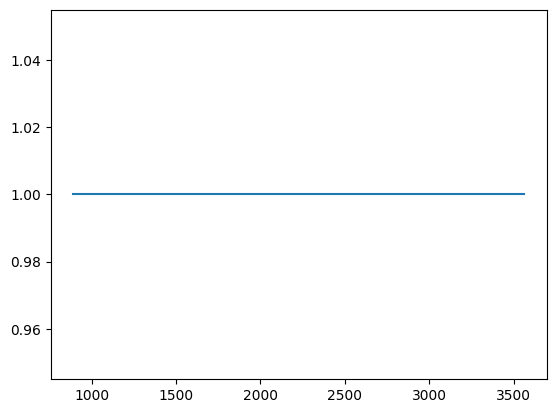

In [8]:
results = pd.read_csv('result.csv')

results[results['classification/accuracy'].notnull()]['classification/accuracy'].plot()

In [9]:
results[results['classification/accuracy'].notnull()].tail()

,step,elapsed_tokens,elapsed_examples,training_loss,training_sequence_accuracy,training_token_accuracy,validation_loss,validation_sequence_accuracy,validation_token_accuracy,classification/accuracy,classification/precision,classification/recall,classification/auroc,classification/auprc,classification/f1.0
891,892,520928,7136,0.001780,1.0,1.0,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0
1782,1783,1041272,14264,0.001350,1.0,1.0,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0
2673,2674,1561616,21392,0.001297,1.0,1.0,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0
3562,3563,2080792,28504,0.001282,1.0,1.0,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0


In [10]:
test_df = pd.read_json('mushrooms_prepared_valid.jsonl', lines=True)
test_df.head()

,prompt,completion
0,"['x', 's', 'g', 'f', 'n', 'f', 'w', 'b', 'k', ...",e
1,"['b', 's', 'y', 't', 'a', 'f', 'c', 'b', 'g', ...",e
2,"['f', 'f', 'w', 'f', 'n', 'f', 'w', 'b', 'k', ...",e
3,"['b', 'y', 'y', 't', 'l', 'f', 'c', 'b', 'n', ...",e
4,"['b', 'y', 'w', 't', 'l', 'f', 'c', 'b', 'n', ...",e


In [16]:
ft_model = 'ada:ft-personal-2022-10-21-05-08-11'
res = openai.Completion.create(model=ft_model, prompt=test_df['prompt'][0],
                               max_tokens=1, temperature=0)

res['choices'][0]['text']

' e'